In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('data.db')

query_table = "SELECT name FROM sqlite_master WHERE type='table';"
table_names = pd.read_sql_query(query_table,conn)['name'].tolist()

print(f"Tables in the database:{table_names}")

Tables in the database:['weather', 'sqlite_sequence', 'daily_weather', 'global_weather']


In [3]:
dfs = {}
for table in table_names:
    dfs[table] = pd.read_sql_query(f"SELECT * FROM {table}",conn)
    print(f"Read table {table}")
conn.close()

Read table weather
Read table sqlite_sequence
Read table daily_weather
Read table global_weather


In [4]:
weather_df = dfs['weather']
daily_weather_df = dfs['daily_weather']
global_weather_df = dfs['global_weather']

In [5]:
weather_df.head()

,id,city,lat,lon,temp,humidity,weather,utc_timestamp,country,local_timestamp
0,1,New Delhi,28.612820,77.231140,29.32,69,overcast clouds,2025-08-12 07:04:18,IN,2025-08-12 12:34:18
1,2,Bhopal,23.266670,77.400002,26.55,72,broken clouds,2025-08-12 06:53:16,IN,2025-08-12 12:23:16
2,3,Jaipur,23.433331,86.133331,34.17,48,overcast clouds,2025-08-12 06:56:34,IN,2025-08-12 12:26:34
3,4,Bengaluru,12.976230,77.603287,26.48,69,overcast clouds,2025-08-12 07:02:02,IN,2025-08-12 12:32:02
4,6,Bhopal,23.266670,77.400002,26.67,72,broken clouds,2025-08-12 07:10:34,IN,2025-08-12 12:40:34


In [6]:
daily_weather_df.head()

,id,city,date,max_temp,min_temp,avg_humidity,country
0,998,Bengaluru,2025-08-12,26.50,20.41,85.642857,IN
1,999,Bengaluru,2025-08-13,23.94,19.22,88.881579,IN
2,1000,Bhopal,2025-08-12,26.67,25.45,84.250000,IN
3,1001,Bhopal,2025-08-13,27.17,23.70,83.405405,IN
4,1002,Jaipur,2025-08-12,34.17,28.53,69.400000,IN


In [7]:
global_weather_df.head()

,city,avg_max_temp,avg_min_temp,avg_humidity,last_updated,country
0,Bengaluru,25.22,19.815,87.262218,None,IN
1,Bhopal,26.92,24.575,83.827703,None,IN
2,Jaipur,33.36,27.840,70.900000,None,IN
3,New Delhi,32.98,28.815,67.700000,None,IN


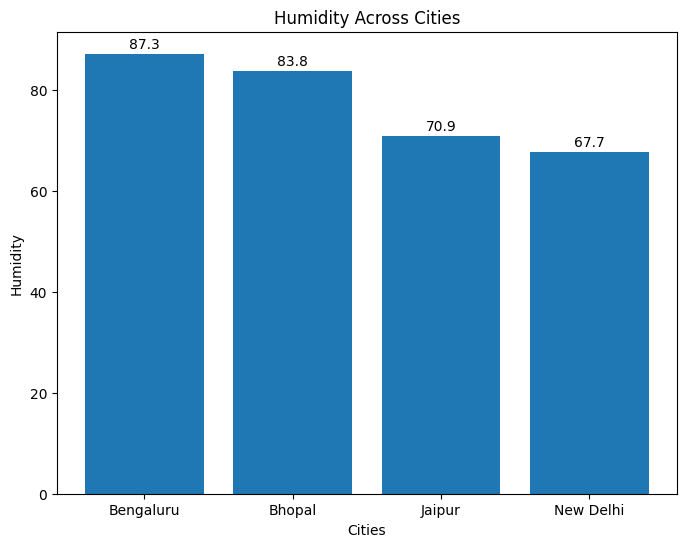

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = plt.bar(global_weather_df['city'], global_weather_df['avg_humidity'])

plt.title('Humidity Across Cities')
plt.xlabel('Cities')
plt.ylabel('Humidity')

# Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,   # position
             f'{height:.1f}',                                # value with 1 decimal
             ha='center', va='bottom')

plt.show()


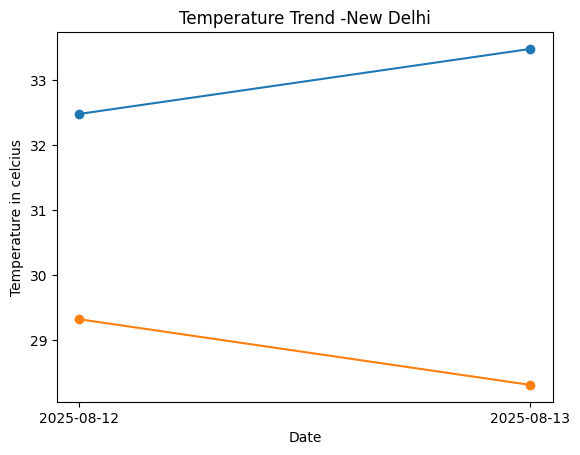

In [19]:
# Delhi Temperature Trend

city = "New Delhi"

city_df = daily_weather_df[daily_weather_df['city']==city]

plt.plot(city_df['date'],city_df['max_temp'],marker='o',label='Max Temp')
plt.plot(city_df['date'],city_df['min_temp'],marker='o',label='Min Temp')

plt.title(f"Temperature Trend -{city}")
plt.xlabel("Date")
plt.ylabel("Temperature in celcius")
plt.show()

In [21]:
weather_df.head()

,id,city,lat,lon,temp,humidity,weather,utc_timestamp,country,local_timestamp
0,1,New Delhi,28.612820,77.231140,29.32,69,overcast clouds,2025-08-12 07:04:18,IN,2025-08-12 12:34:18
1,2,Bhopal,23.266670,77.400002,26.55,72,broken clouds,2025-08-12 06:53:16,IN,2025-08-12 12:23:16
2,3,Jaipur,23.433331,86.133331,34.17,48,overcast clouds,2025-08-12 06:56:34,IN,2025-08-12 12:26:34
3,4,Bengaluru,12.976230,77.603287,26.48,69,overcast clouds,2025-08-12 07:02:02,IN,2025-08-12 12:32:02
4,6,Bhopal,23.266670,77.400002,26.67,72,broken clouds,2025-08-12 07:10:34,IN,2025-08-12 12:40:34


In [29]:
# Most common weather condition by city
most_common = (
    weather_df
    .groupby('city')['weather']
    .agg(lambda x:x.mode()[0])
    .reset_index()
)

print(most_common)

        city          weather
0  Bengaluru  overcast clouds
1     Bhopal  overcast clouds
2     Jaipur  overcast clouds
3  New Delhi  overcast clouds


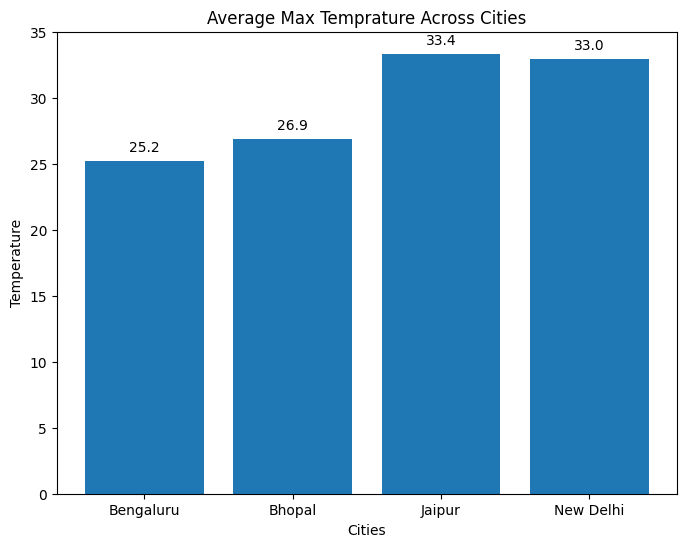

In [31]:
plt.figure(figsize=(8, 6))
bars = plt.bar(global_weather_df['city'], global_weather_df['avg_max_temp'])

plt.title('Average Max Temprature Across Cities')
plt.xlabel('Cities')
plt.ylabel('Temperature')

# Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,   # position
             f'{height:.1f}',                                # value with 1 decimal
             ha='center', va='bottom')

plt.show()

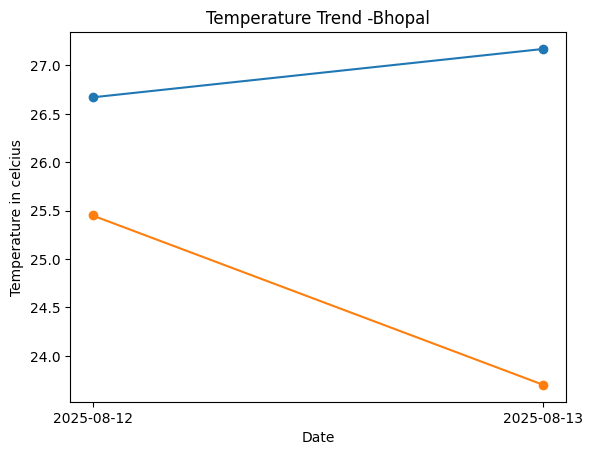

In [32]:
city = "Bhopal"

city_df = daily_weather_df[daily_weather_df['city']==city]

plt.plot(city_df['date'],city_df['max_temp'],marker='o',label='Max Temp')
plt.plot(city_df['date'],city_df['min_temp'],marker='o',label='Min Temp')

plt.title(f"Temperature Trend -{city}")
plt.xlabel("Date")
plt.ylabel("Temperature in celcius")
plt.show()

In [35]:
weather_df.head(20)

,id,city,lat,lon,temp,humidity,weather,utc_timestamp,country,local_timestamp
0,1,New Delhi,28.612820,77.231140,29.32,69,overcast clouds,2025-08-12 07:04:18,IN,2025-08-12 12:34:18
1,2,Bhopal,23.266670,77.400002,26.55,72,broken clouds,2025-08-12 06:53:16,IN,2025-08-12 12:23:16
2,3,Jaipur,23.433331,86.133331,34.17,48,overcast clouds,2025-08-12 06:56:34,IN,2025-08-12 12:26:34
3,4,Bengaluru,12.976230,77.603287,26.48,69,overcast clouds,2025-08-12 07:02:02,IN,2025-08-12 12:32:02
4,6,Bhopal,23.266670,77.400002,26.67,72,broken clouds,2025-08-12 07:10:34,IN,2025-08-12 12:40:34
5,7,Jaipur,23.433331,86.133331,34.17,48,overcast clouds,2025-08-12 07:10:27,IN,2025-08-12 12:40:27
6,48,New Delhi,28.612820,77.231140,29.32,69,overcast clouds,2025-08-12 07:17:25,IN,2025-08-12 12:47:25
7,49,Bhopal,23.266670,77.400002,26.67,73,broken clouds,2025-08-12 07:18:21,IN,2025-08-12 12:48:21
8,50,Jaipur,23.433331,86.133331,34.17,48,overcast clouds,2025-08-12 07:20:52,IN,2025-08-12 12:50:52
9,51,Bengaluru,12.976230,77.603287,26.50,69,overcast clouds,2025-08-12 07:17:27,IN,2025-08-12 12:47:27


In [37]:
weather_df['local_timestamp'] = pd.to_datetime(weather_df['local_timestamp'])

weather_df['hour'] = weather_df['local_timestamp'].dt.hour

weather_df['time_of_day']=weather_df['hour'].apply(lambda h:'Day' if 6<=h<18 else 'Night')

city_name='Bhopal'
city_df = weather_df[weather_df['city']==city_name]


In [38]:
city_df.head()

,id,city,lat,lon,temp,humidity,weather,utc_timestamp,country,local_timestamp,hour,time_of_day
1,2,Bhopal,23.26667,77.400002,26.55,72,broken clouds,2025-08-12 06:53:16,IN,2025-08-12 12:23:16,12,Day
4,6,Bhopal,23.26667,77.400002,26.67,72,broken clouds,2025-08-12 07:10:34,IN,2025-08-12 12:40:34,12,Day
7,49,Bhopal,23.26667,77.400002,26.67,73,broken clouds,2025-08-12 07:18:21,IN,2025-08-12 12:48:21,12,Day
11,53,Bhopal,23.26667,77.400002,25.45,87,overcast clouds,2025-08-12 16:32:16,IN,2025-08-12 22:02:16,22,Night
15,57,Bhopal,23.26667,77.400002,25.45,87,overcast clouds,2025-08-12 16:48:26,IN,2025-08-12 22:18:26,22,Night


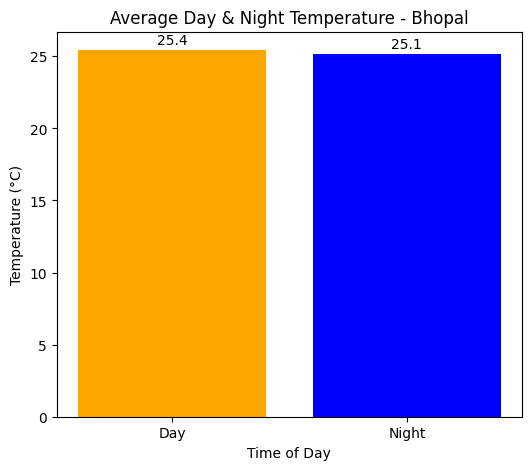

In [40]:
import matplotlib.pyplot as plt

# Group by time_of_day and get average temp for the city
city_name = "Bhopal"
city_df = weather_df[weather_df['city'] == city_name]

avg_temps = city_df.groupby('time_of_day')['temp'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(avg_temps['time_of_day'], avg_temps['temp'], color=['orange', 'blue'])

plt.title(f"Average Day & Night Temperature - {city_name}")
plt.xlabel("Time of Day")
plt.ylabel("Temperature (°C)")

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,
             f"{height:.1f}", ha='center', va='bottom')

plt.show()
